In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sns

In [2]:
df = pd.read_excel('Тестовое задание_аналитик данных.xlsx', header=None, sheet_name='for PQ').fillna('-').iloc[:22,:13]

In [3]:
df.loc[df[0] == 'UTM-метки',0] = 'Сегмент 1'
df['Партнер'] = df[0].apply(lambda x: x if 'Партнер' in x else np.nan)
df['Партнер'] = df['Партнер'].ffill()

df['Сегмент'] = df[0].apply(lambda x: x if 'Сегмент' in x else np.nan)
df['Сегмент'] = df['Сегмент'].ffill()

df['Клиент'] = df[1].apply(lambda x: x if 'клиенты' in x else 'filtered')

In [4]:
df.columns = list( df.iloc[2][:-3] ) + ( ['Партнер','Сегмент','Клиент'] )
df.columns

Index(['Сегмент 1', 'Тип клиента', 'Количество смс', 'Расходы', 'Заходы',
       'Короткие заявки, шт.', 'Одобренные короткие заявки, шт',
       'Процент одобрения (прескоринг)', 'Длинные заявки, шт.',
       'Одобренные длинные заявки, шт', 'Процент одобрения (скоринг)',
       'Кредиты, шт', 'кредитные карты, шт (доп.продажа)', 'Партнер',
       'Сегмент', 'Клиент'],
      dtype='object')

In [5]:
df = df[df['Клиент'] != 'filtered'][[
    'Партнер','Сегмент', 'Клиент',
    'Количество смс', 'Расходы', 'Заходы',
    'Короткие заявки, шт.', 'Одобренные короткие заявки, шт',
    'Процент одобрения (прескоринг)', 'Длинные заявки, шт.',
    'Одобренные длинные заявки, шт', 'Процент одобрения (скоринг)',
    'Кредиты, шт', 'кредитные карты, шт (доп.продажа)']]
df

,Партнер,Сегмент,Клиент,Количество смс,Расходы,Заходы,"Короткие заявки, шт.","Одобренные короткие заявки, шт",Процент одобрения (прескоринг),"Длинные заявки, шт.","Одобренные длинные заявки, шт",Процент одобрения (скоринг),"Кредиты, шт","кредитные карты, шт (доп.продажа)"
3,Партнер 1,Сегмент 1,новые клиенты,51052,188892.4,854,693,250,0.36075,142,21,0.147887,5,-
4,Партнер 1,Сегмент 1,текущие клиенты,-,-,2431,1913,759,0.396759,537,88,0.163873,21,1
10,Партнер 2,Сегмент 1,новые клиенты,17144,92578.525785,332,219,126,0.575342,74,36,0.486486,22,6
11,Партнер 2,Сегмент 1,текущие клиенты,-,-,848,596,351,0.588926,282,143,0.507092,104,12
12,Партнер 2,Сегмент 2,новые клиенты,38411,207421.474215,4,3,2,0.666667,1,0,0,-,-
13,Партнер 2,Сегмент 2,текущие клиенты,-,-,25,20,12,0.6,9,3,0.333333,1,0
19,Партнер 3,Сегмент 1,новые клиенты,55491,260807.7,1358,1105,254,0.229864,113,35,0.309735,21,-
20,Партнер 3,Сегмент 1,текущие клиенты,-,-,1622,1310,376,0.287023,153,52,0.339869,33,3


In [6]:
for column in ['Количество смс', 'Расходы', 'Заходы',
       'Короткие заявки, шт.', 'Одобренные короткие заявки, шт', 'Длинные заявки, шт.',
       'Одобренные длинные заявки, шт','Кредиты, шт', 'кредитные карты, шт (доп.продажа)']:
    df[column] = df[column].apply(lambda x: float( str(x).replace('-','0')))
    
for column in ['Количество смс', 'Заходы',
       'Короткие заявки, шт.', 'Одобренные короткие заявки, шт', 'Длинные заявки, шт.',
       'Одобренные длинные заявки, шт','Кредиты, шт', 'кредитные карты, шт (доп.продажа)']:
    df[column] = df[column].apply(lambda x: int(x))
    
def part_seg(x):
    string = x['Сегмент'][:-2] + '-' + x['Партнер'][-2:].replace(' ','') + '-' + x['Сегмент'][-2:].replace(' ','')
    print(string)
    return string
    
df['П_Сегмент'] = df.apply(part_seg, axis=1)

Сегмент-1-1
Сегмент-1-1
Сегмент-2-1
Сегмент-2-1
Сегмент-2-2
Сегмент-2-2
Сегмент-3-1
Сегмент-3-1


In [7]:
df_1 = df[['Партнер', 'П_Сегмент', 'Сегмент', 'Клиент', 'Количество смс', 'Расходы', 'Заходы',
       'Короткие заявки, шт.', 'Одобренные короткие заявки, шт', 'Длинные заявки, шт.',
       'Одобренные длинные заявки, шт','Кредиты, шт', 'кредитные карты, шт (доп.продажа)']]
df_1

,Партнер,П_Сегмент,Сегмент,Клиент,Количество смс,Расходы,Заходы,"Короткие заявки, шт.","Одобренные короткие заявки, шт","Длинные заявки, шт.","Одобренные длинные заявки, шт","Кредиты, шт","кредитные карты, шт (доп.продажа)"
3,Партнер 1,Сегмент-1-1,Сегмент 1,новые клиенты,51052,188892.400000,854,693,250,142,21,5,0
4,Партнер 1,Сегмент-1-1,Сегмент 1,текущие клиенты,0,0.000000,2431,1913,759,537,88,21,1
10,Партнер 2,Сегмент-2-1,Сегмент 1,новые клиенты,17144,92578.525785,332,219,126,74,36,22,6
11,Партнер 2,Сегмент-2-1,Сегмент 1,текущие клиенты,0,0.000000,848,596,351,282,143,104,12
12,Партнер 2,Сегмент-2-2,Сегмент 2,новые клиенты,38411,207421.474215,4,3,2,1,0,0,0
13,Партнер 2,Сегмент-2-2,Сегмент 2,текущие клиенты,0,0.000000,25,20,12,9,3,1,0
19,Партнер 3,Сегмент-3-1,Сегмент 1,новые клиенты,55491,260807.700000,1358,1105,254,113,35,21,0
20,Партнер 3,Сегмент-3-1,Сегмент 1,текущие клиенты,0,0.000000,1622,1310,376,153,52,33,3


In [8]:
df_1.to_excel('sms_python_data.xlsx')

In [9]:
df_1.columns[4:]

Index(['Количество смс', 'Расходы', 'Заходы', 'Короткие заявки, шт.',
       'Одобренные короткие заявки, шт', 'Длинные заявки, шт.',
       'Одобренные длинные заявки, шт', 'Кредиты, шт',
       'кредитные карты, шт (доп.продажа)'],
      dtype='object')

In [10]:
df_1_clients = df_1.groupby('Клиент')[df_1.columns[4:]].sum()
df_1_clients

,Количество смс,Расходы,Заходы,"Короткие заявки, шт.","Одобренные короткие заявки, шт","Длинные заявки, шт.","Одобренные длинные заявки, шт","Кредиты, шт","кредитные карты, шт (доп.продажа)"
Клиент,,,,,,,,,
новые клиенты,162098,749700.1,2548,2020,632,330,92,48,6
текущие клиенты,0,0.0,4926,3839,1498,981,286,159,16


In [11]:
def divide(df):
    if df[1] == 0:
        ret = 0
    else:
        ret = df[0].sum() / df[1].sum()
    return ret

df_1_clients = df_1.groupby('Клиент')[df_1.columns[4:]].sum()

df_1_clients['Расход на смс'] = df_1_clients[['Расходы','Количество смс']].apply(divide, axis=1)
df_1_clients['Конверсия в заход'] = df_1_clients[['Заходы','Количество смс']].apply(divide, axis=1)
df_1_clients['Конверсия в короткие заявки'] = df_1_clients[['Короткие заявки, шт.','Заходы']].apply(divide, axis=1)
df_1_clients['Прескоринг'] = df_1_clients[['Одобренные короткие заявки, шт','Короткие заявки, шт.']].apply(divide, axis=1)
df_1_clients['Конверсия в короткие заявки'] = df_1_clients[['Длинные заявки, шт.','Одобренные короткие заявки, шт']].apply(divide, axis=1)
df_1_clients['Скоринг'] = df_1_clients[['Одобренные длинные заявки, шт','Длинные заявки, шт.']].apply(divide, axis=1)
df_1_clients['Конверсия в длинные заявки'] = df_1_clients[['Кредиты, шт','Одобренные длинные заявки, шт']].apply(divide, axis=1)
df_1_clients['Доля доп.продаж'] = df_1_clients[['кредитные карты, шт (доп.продажа)','Кредиты, шт']].apply(divide, axis=1)

df_1_clients_T = df_1_clients.T

df_1_clients_T['отклонение новых'] = df_1_clients_T['новые клиенты'] - df_1_clients_T['текущие клиенты']
df_1_clients_T['доля новых'] = df_1_clients_T['новые клиенты'] / ( df_1_clients_T['текущие клиенты'] + df_1_clients_T['новые клиенты'] )
df_1_clients_T.iloc[-7:,-1] = np.nan

df_1_clients_T.to_excel('sms_python_clients.xlsx')
df_1_clients_T.T.reset_index().iloc[:2].to_excel('sms_python_clients.xlsx')
df_1_clients_T

Клиент,новые клиенты,текущие клиенты,отклонение новых,доля новых
Количество смс,162098.000000,0.000000,162098.000000,1.000000
Расходы,749700.100000,0.000000,749700.100000,1.000000
Заходы,2548.000000,4926.000000,-2378.000000,0.340915
"Короткие заявки, шт.",2020.000000,3839.000000,-1819.000000,0.344769
"Одобренные короткие заявки, шт",632.000000,1498.000000,-866.000000,0.296714
"Длинные заявки, шт.",330.000000,981.000000,-651.000000,0.251716
"Одобренные длинные заявки, шт",92.000000,286.000000,-194.000000,0.243386
"Кредиты, шт",48.000000,159.000000,-111.000000,0.231884
"кредитные карты, шт (доп.продажа)",6.000000,16.000000,-10.000000,0.272727
Расход на смс,4.624981,0.000000,4.624981,NaN


In [12]:
rate_cost = 12000

df_1['Целевая стоимость'] = df_1['Кредиты, шт'] * rate_cost
df_1['Стоимость кредита'] = df_1['Расходы'] / df_1['Кредиты, шт']
df_1['Стоимость кредита'] = df_1['Стоимость кредита'].astype(float)
df_1['Стоимость кредита_целевая'] = df_1['Стоимость кредита'].apply(lambda x: 1*(x <= 12000) )

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
df_1

,Партнер,П_Сегмент,Сегмент,Клиент,Количество смс,Расходы,Заходы,"Короткие заявки, шт.","Одобренные короткие заявки, шт","Длинные заявки, шт.","Одобренные длинные заявки, шт","Кредиты, шт","кредитные карты, шт (доп.продажа)",Целевая стоимость,Стоимость кредита,Стоимость кредита_целевая
3,Партнер 1,Сегмент-1-1,Сегмент 1,новые клиенты,51052,188892.400000,854,693,250,142,21,5,0,60000,3.777848e+04,0
4,Партнер 1,Сегмент-1-1,Сегмент 1,текущие клиенты,0,0.000000,2431,1913,759,537,88,21,1,252000,0.000000e+00,1
10,Партнер 2,Сегмент-2-1,Сегмент 1,новые клиенты,17144,92578.525785,332,219,126,74,36,22,6,264000,4.208115e+03,1
11,Партнер 2,Сегмент-2-1,Сегмент 1,текущие клиенты,0,0.000000,848,596,351,282,143,104,12,1248000,0.000000e+00,1
12,Партнер 2,Сегмент-2-2,Сегмент 2,новые клиенты,38411,207421.474215,4,3,2,1,0,0,0,0,inf,0
13,Партнер 2,Сегмент-2-2,Сегмент 2,текущие клиенты,0,0.000000,25,20,12,9,3,1,0,12000,0.000000e+00,1
19,Партнер 3,Сегмент-3-1,Сегмент 1,новые клиенты,55491,260807.700000,1358,1105,254,113,35,21,0,252000,1.241941e+04,0
20,Партнер 3,Сегмент-3-1,Сегмент 1,текущие клиенты,0,0.000000,1622,1310,376,153,52,33,3,396000,0.000000e+00,1


In [14]:
columns = ['П_Сегмент','Клиент']

df_2 = df_1.groupby(by=columns)[['Кредиты, шт','Расходы','Целевая стоимость']].sum()

df_2['Стоимость кредита'] = df_2['Расходы'] / df_2['Кредиты, шт']
df_2['Расходы'] = round(df_2['Расходы'])
df_2['Стоимость кредита'] = round(df_2['Стоимость кредита'])
df_2['Стоимость кредита_целевая'] = df_2['Стоимость кредита'].apply(lambda x: 'целевой' if x <= 12000 else 'выше')
df_2['Доля реального расхода'] = df_2[['Расходы','Целевая стоимость']].apply(divide, axis=1) * 100
df_2.reset_index().sort_values(by=columns[::-1])

,П_Сегмент,Клиент,"Кредиты, шт",Расходы,Целевая стоимость,Стоимость кредита,Стоимость кредита_целевая,Доля реального расхода
0,Сегмент-1-1,новые клиенты,5,188892.0,60000,37778.0,выше,314.820000
2,Сегмент-2-1,новые клиенты,22,92579.0,264000,4208.0,целевой,35.067803
4,Сегмент-2-2,новые клиенты,0,207421.0,0,inf,выше,0.000000
6,Сегмент-3-1,новые клиенты,21,260808.0,252000,12419.0,выше,103.495238
1,Сегмент-1-1,текущие клиенты,21,0.0,252000,0.0,целевой,0.000000
3,Сегмент-2-1,текущие клиенты,104,0.0,1248000,0.0,целевой,0.000000
5,Сегмент-2-2,текущие клиенты,1,0.0,12000,0.0,целевой,0.000000
7,Сегмент-3-1,текущие клиенты,33,0.0,396000,0.0,целевой,0.000000


In [15]:
columns = ['Партнер','Клиент']

df_2 = df_1.groupby(by=columns)[['Кредиты, шт','Расходы','Целевая стоимость']].sum()

df_2['Стоимость кредита'] = df_2['Расходы'] / df_2['Кредиты, шт']
df_2['Расходы'] = round(df_2['Расходы'])
df_2['Стоимость кредита'] = round(df_2['Стоимость кредита'])
df_2['Стоимость кредита_целевая'] = df_2['Стоимость кредита'].apply(lambda x: 'целевой' if x <= 12000 else 'выше')
df_2['Доля реального расхода'] = df_2[['Расходы','Целевая стоимость']].apply(divide, axis=1) * 100
df_2.reset_index().sort_values(by=columns[::-1])

,Партнер,Клиент,"Кредиты, шт",Расходы,Целевая стоимость,Стоимость кредита,Стоимость кредита_целевая,Доля реального расхода
0,Партнер 1,новые клиенты,5,188892.0,60000,37778.0,выше,314.820000
2,Партнер 2,новые клиенты,22,300000.0,264000,13636.0,выше,113.636364
4,Партнер 3,новые клиенты,21,260808.0,252000,12419.0,выше,103.495238
1,Партнер 1,текущие клиенты,21,0.0,252000,0.0,целевой,0.000000
3,Партнер 2,текущие клиенты,105,0.0,1260000,0.0,целевой,0.000000
5,Партнер 3,текущие клиенты,33,0.0,396000,0.0,целевой,0.000000


In [16]:
columns = ['Клиент']

df_2 = df_1.groupby(by=columns)[['Кредиты, шт','Расходы','Целевая стоимость']].sum()

df_2['Стоимость кредита'] = df_2['Расходы'] / df_2['Кредиты, шт']
df_2['Расходы'] = round(df_2['Расходы'])
df_2['Стоимость кредита'] = round(df_2['Стоимость кредита'])
df_2['Стоимость кредита_целевая'] = df_2['Стоимость кредита'].apply(lambda x: 'целевой' if x <= 12000 else 'выше')
df_2['Доля реального расхода'] = df_2[['Расходы','Целевая стоимость']].apply(divide, axis=1) * 100
df_2.reset_index().sort_values(by=columns[::-1])

,Клиент,"Кредиты, шт",Расходы,Целевая стоимость,Стоимость кредита,Стоимость кредита_целевая,Доля реального расхода
0,новые клиенты,48,749700.0,576000,15619.0,выше,130.15625
1,текущие клиенты,159,0.0,1908000,0.0,целевой,0.00000


In [17]:
columns = ['П_Сегмент']

df_2 = df_1.groupby(by=columns)[['Кредиты, шт','Расходы','Целевая стоимость']].sum()

df_2['Стоимость кредита'] = df_2['Расходы'] / df_2['Кредиты, шт']
df_2['Расходы'] = round(df_2['Расходы'])
df_2['Стоимость кредита'] = round(df_2['Стоимость кредита'])
df_2['Стоимость кредита_целевая'] = df_2['Стоимость кредита'].apply(lambda x: 'целевой' if x <= 12000 else 'выше')
df_2['Доля реального расхода'] = df_2[['Расходы','Целевая стоимость']].apply(divide, axis=1) * 100
df_2.reset_index().sort_values(by=columns[::-1])

,П_Сегмент,"Кредиты, шт",Расходы,Целевая стоимость,Стоимость кредита,Стоимость кредита_целевая,Доля реального расхода
0,Сегмент-1-1,26,188892.0,312000,7265.0,целевой,60.542308
1,Сегмент-2-1,126,92579.0,1512000,735.0,целевой,6.122950
2,Сегмент-2-2,1,207421.0,12000,207421.0,выше,1728.508333
3,Сегмент-3-1,54,260808.0,648000,4830.0,целевой,40.248148


In [19]:
df_3 = df_1[['Партнер','П_Сегмент','Сегмент','Клиент','Заходы','Короткие заявки, шт.','Одобренные длинные заявки, шт','Кредиты, шт']]
df_3['Конверсия в заявку'] = df_3['Короткие заявки, шт.'] / df_3['Заходы']
df_3['Скоринг'] = df_3['Одобренные длинные заявки, шт'] / df_3['Короткие заявки, шт.']
df_3

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Партнер,П_Сегмент,Сегмент,Клиент,Заходы,"Короткие заявки, шт.","Одобренные длинные заявки, шт","Кредиты, шт",Конверсия в заявку,Скоринг
3,Партнер 1,Сегмент-1-1,Сегмент 1,новые клиенты,854,693,21,5,0.811475,0.030303
4,Партнер 1,Сегмент-1-1,Сегмент 1,текущие клиенты,2431,1913,88,21,0.786919,0.046001
10,Партнер 2,Сегмент-2-1,Сегмент 1,новые клиенты,332,219,36,22,0.659639,0.164384
11,Партнер 2,Сегмент-2-1,Сегмент 1,текущие клиенты,848,596,143,104,0.702830,0.239933
12,Партнер 2,Сегмент-2-2,Сегмент 2,новые клиенты,4,3,0,0,0.750000,0.000000
13,Партнер 2,Сегмент-2-2,Сегмент 2,текущие клиенты,25,20,3,1,0.800000,0.150000
19,Партнер 3,Сегмент-3-1,Сегмент 1,новые клиенты,1358,1105,35,21,0.813697,0.031674
20,Партнер 3,Сегмент-3-1,Сегмент 1,текущие клиенты,1622,1310,52,33,0.807645,0.039695


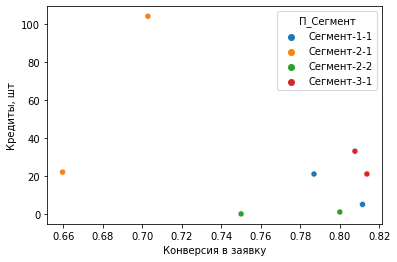

In [20]:
sns.scatterplot(data=df_3, x='Конверсия в заявку', y='Кредиты, шт', hue='П_Сегмент');

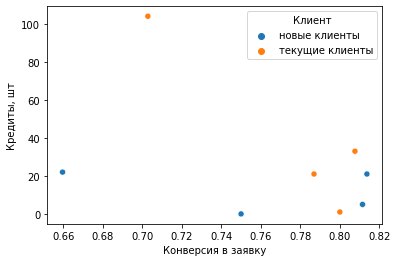

In [21]:
sns.scatterplot(data=df_3, x='Конверсия в заявку', y='Кредиты, шт', hue='Клиент');